## **Deep AutoEncoders (Undercomplete)**

The main of goal of deep autoencoders is just to reconstruct the input vector. Helpful to detect anomalies because the reconstruction loss will greater for variables with anomalies.

In [ ]:
## MNIST data set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [ ]:
## Training and Test Datasets
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
## shapes
X_test.shape

(10000, 28, 28)

### **Plotting an Image**

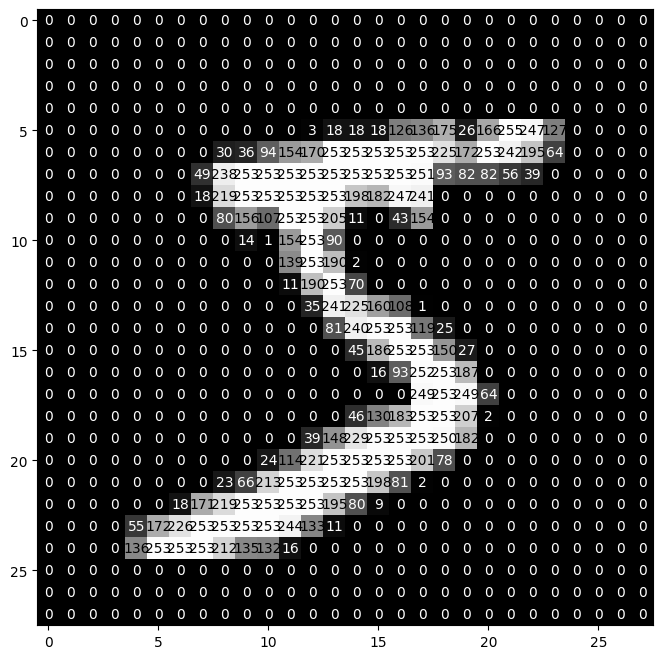

In [ ]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
visualize_input(X_train[0].reshape(28,28), ax)

### **Standardize the Images**

We want to make the variables standardized (0 - 1 works well). Exploding or vanishing gradients are a problem with neural networks.

In [ ]:
## divide by 255
X_train = X_train/255
X_test = X_test/255

In [ ]:
## Flatten the image
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

### **Deep AutoEncoder**

We do not need y_train or y_test, because this is an unsupervised technique. Reconstructing the image is the goal.

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

In [ ]:
## Architecture
AE = Sequential()
AE.add(Input(shape = (784,)))
AE.add(Dense(units = 100, activation = "relu")) ## encoder
AE.add(Dense(units = 50, activation = "relu"))  ## encoder
AE.add(Dense(units = 36, activation = "relu"))  ## code - bottleneck
AE.add(Dense(units = 50, activation = "relu"))  ## decoder
AE.add(Dense(units = 100, activation = "relu")) ## decoder
AE.add(Dense(units = 784, activation = "sigmoid")) ## decoder

In [ ]:
## summary
AE.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 36)                1836      
                                                                 
 dense_3 (Dense)             (None, 50)                1850      
                                                                 
 dense_4 (Dense)             (None, 100)               5100      
                                                                 
 dense_5 (Dense)             (None, 784)               79184     
                                                                 
Total params: 171520 (670.00 KB)
Trainable params: 17152

In [ ]:
## compile it
AE.compile(optimizer = "adam", loss = "binary_crossentropy")

In [ ]:
## fit
## X = X_train, y = X_train
AE.fit(X_train, X_train, batch_size = 256, epochs = 50, validation_data = (X_test, X_test))

Epoch 1/50
235/235 [==============================] - 8s 28ms/step - loss: 0.2503 - val_loss: 0.1714
Epoch 2/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1554 - val_loss: 0.1437
Epoch 3/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1384 - val_loss: 0.1307
Epoch 4/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1277 - val_loss: 0.1218
Epoch 5/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1203 - val_loss: 0.1159
Epoch 6/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1156 - val_loss: 0.1119
Epoch 7/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1118 - val_loss: 0.1090
Epoch 8/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1089 - val_loss: 0.1068
Epoch 9/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1064 - val_loss: 0.1039
Epoch 10/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1043 - val_lo

In [ ]:
## PREDICTION
## reconstruction
## DO NOT COMPUTE accuracy
DecodedImage = AE.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
DecodedImage.shape

(10000, 784)

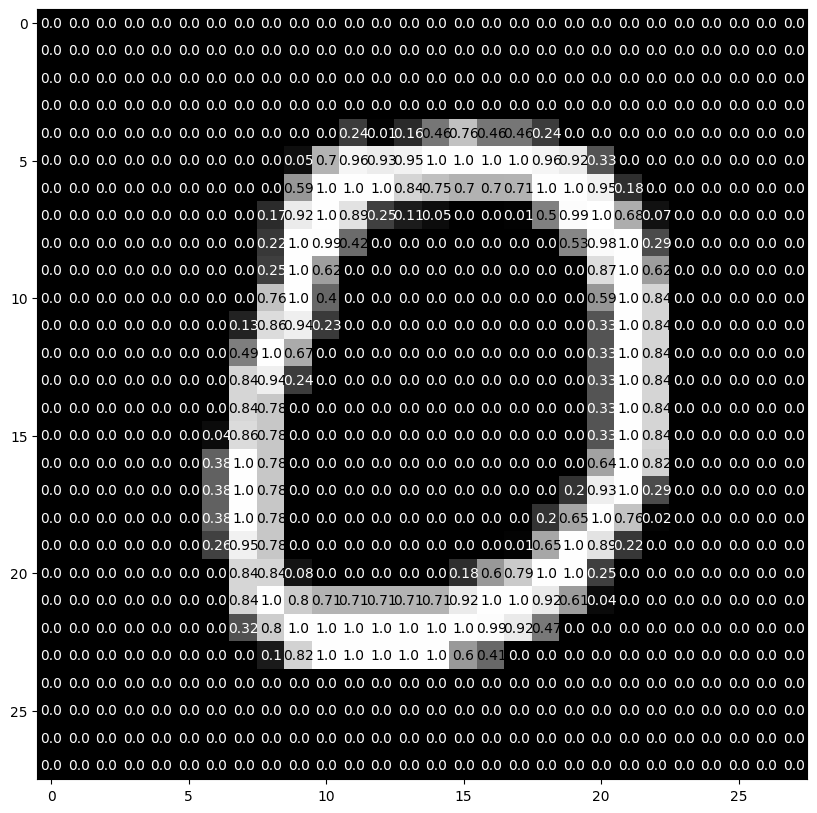

In [ ]:
## plot image 1 on the test
## TRUE IMAGE
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
visualize_input(X_test[10].reshape(28,28), ax)

In [ ]:
X_test.shape[1]

784

1/1 [==============================] - 0s 27ms/step


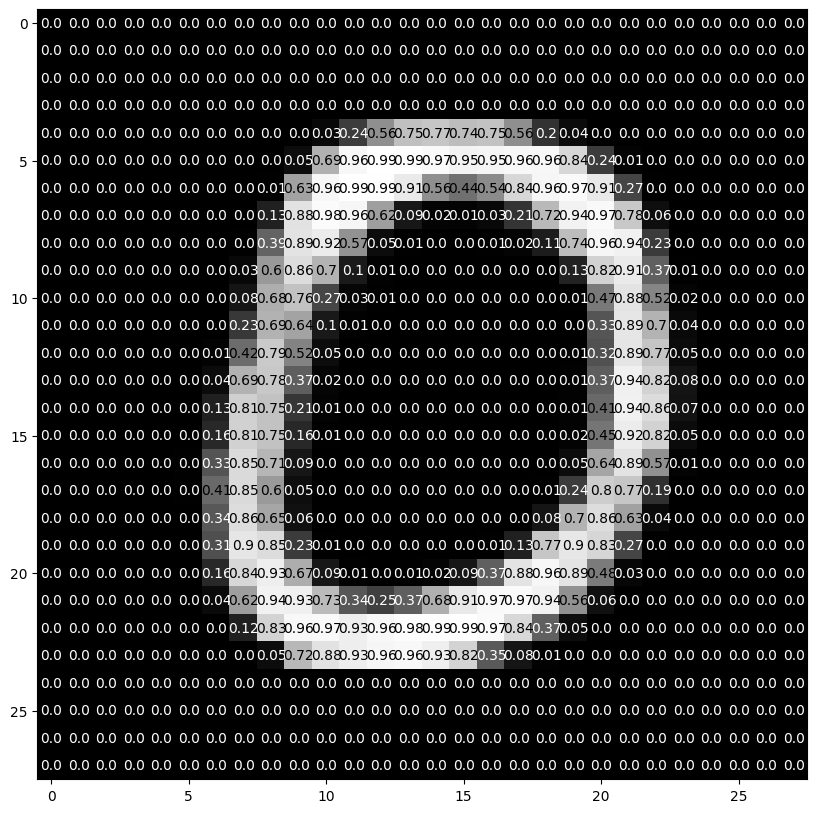

In [ ]:
## plot image 1 on the test
## RECONSTRUCTED IMAGE
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
visualize_input(AE.predict(X_test[10].reshape((-1,784))).reshape(28,28), ax)

## **Alternate Way to Fit an AutoEncoder**

Sometimes we want to split the encoder from the decoder. In other words, create 2 different neural networks, one is the encoder and the other the decoder.

In [ ]:
from tensorflow.keras.layers import Reshape, InputLayer

In [ ]:
## network 1: encoder
encoder = Sequential()
encoder.add(Input(shape = (784,)))
encoder.add(Dense(100, activation = "relu"))
encoder.add(Dense(50, activation = "relu"))
encoder.add(Dense(36, activation ="relu"))

In [ ]:
## network 2: decoder
decoder = Sequential()
decoder.add(Input(shape = (36,)))
decoder.add(Dense(50, activation = "relu"))
decoder.add(Dense(100, activation = "relu"))
decoder.add(Dense(784, activation ="sigmoid"))

In [ ]:
from keras.models import Model
input = Input(shape = (784, ))
AE1 = Model(input, decoder(encoder(input)))

In [ ]:
## compile
AE1.compile(optimizer = "adam", loss = "binary_crossentropy")

In [ ]:
## fit
AE1.fit(X_train, X_train, batch_size = 256, epochs = 30, validation_data = (X_test, X_test))

Epoch 1/30
235/235 [==============================] - 5s 18ms/step - loss: 0.2529 - val_loss: 0.1720
Epoch 2/30
235/235 [==============================] - 5s 20ms/step - loss: 0.1554 - val_loss: 0.1423
Epoch 3/30
235/235 [==============================] - 4s 16ms/step - loss: 0.1379 - val_loss: 0.1314
Epoch 4/30
235/235 [==============================] - 4s 16ms/step - loss: 0.1291 - val_loss: 0.1240
Epoch 5/30
235/235 [==============================] - 5s 21ms/step - loss: 0.1230 - val_loss: 0.1190
Epoch 6/30
235/235 [==============================] - 4s 16ms/step - loss: 0.1182 - val_loss: 0.1148
Epoch 7/30
235/235 [==============================] - 4s 18ms/step - loss: 0.1149 - val_loss: 0.1122
Epoch 8/30
235/235 [==============================] - 5s 21ms/step - loss: 0.1123 - val_loss: 0.1098
Epoch 9/30
235/235 [==============================] - 4s 16ms/step - loss: 0.1102 - val_loss: 0.1079
Epoch 10/30
235/235 [==============================] - 4s 16ms/step - loss: 0.1084 - val_lo

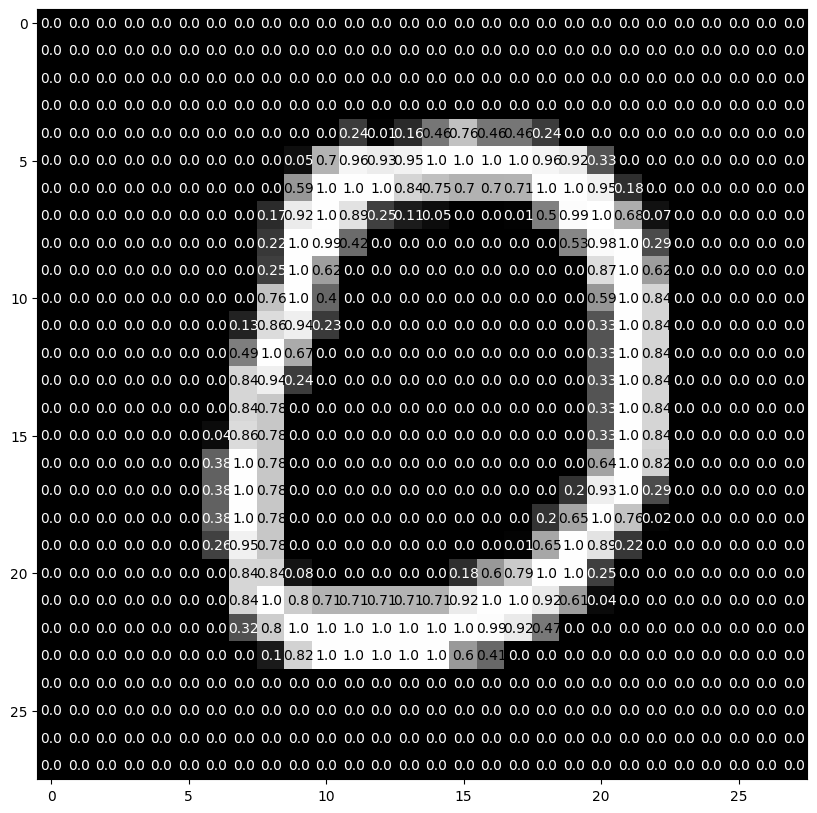

In [ ]:
## plot image 1 on the test
## TRUE IMAGE
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
visualize_input(X_test[10].reshape(28,28), ax)

1/1 [==============================] - 0s 238ms/step


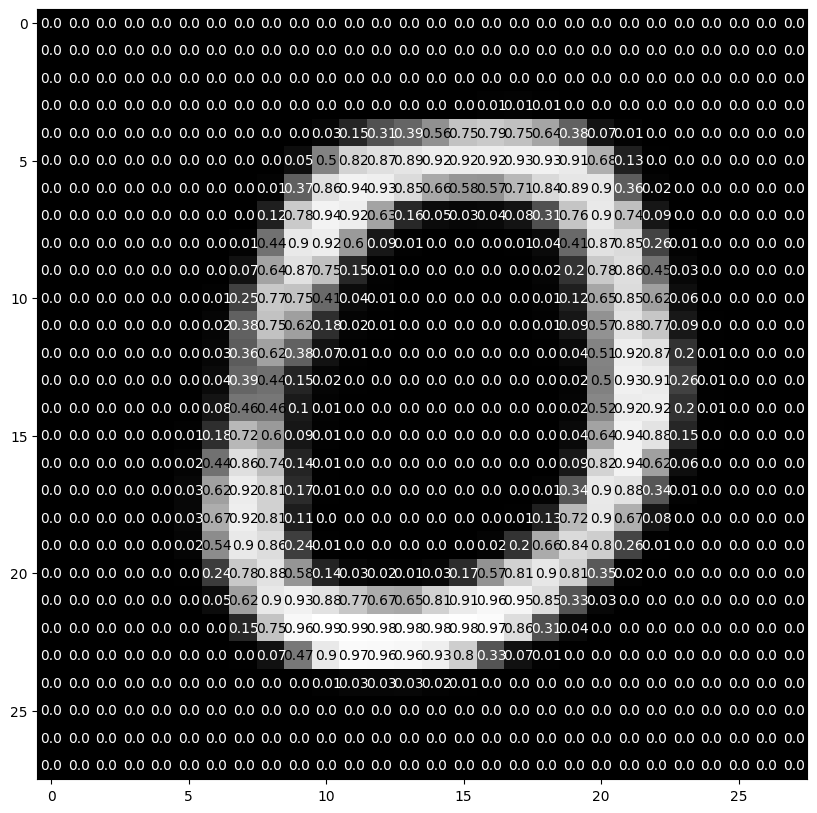

In [ ]:
## plot image 1 on the test
## RECONSTRUCTED IMAGE
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
visualize_input(AE1.predict(X_test[10].reshape((-1,784))).reshape(28,28), ax)

1/1 [==============================] - 0s 68ms/step


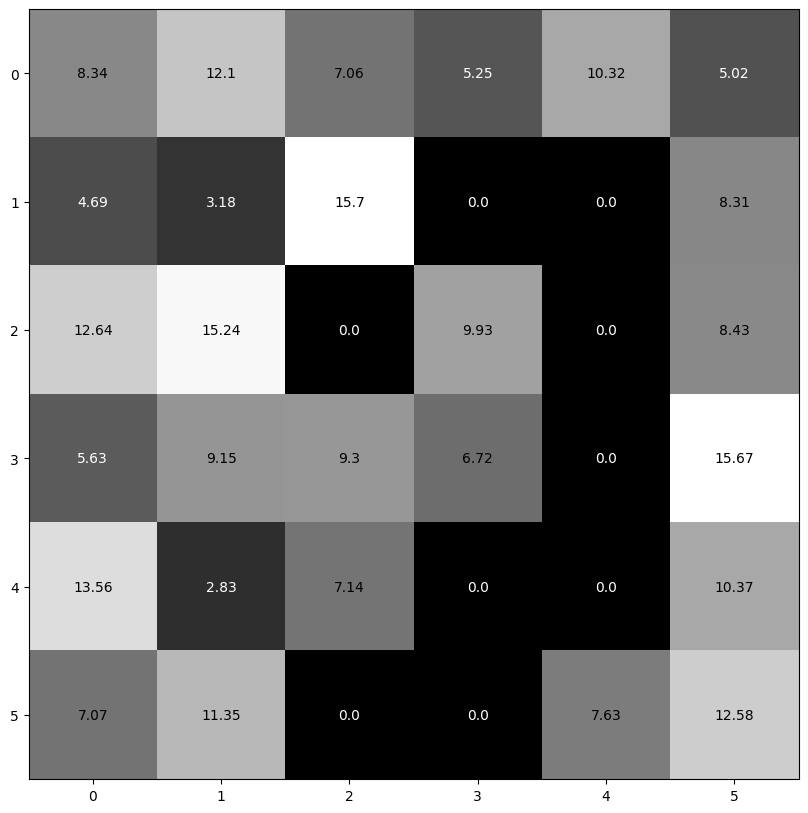

In [ ]:
## COMPRESSED VERSION OF THE PIXELS 36  (6X6)
## plot image 1 on the test
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
visualize_input(encoder.predict(X_test[10].reshape((-1,784))).reshape(6,6), ax)